In [1]:
import irondb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
df_clean = pd.read_csv('df clean.csv').drop(columns='Unnamed: 0')

In [144]:
df_clean.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,raisins,nuts,chocolate,oats,peanut butter,butter type_melted,baking_index
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,15.2,1.30,1,0,0,0,0,1,3630.0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,12.4,1.71,1,0,0,0,0,1,4368.0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,9.4,1.78,0,1,1,0,0,1,5040.0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,12.2,1.59,0,0,1,0,0,1,5145.0
4,0.24,2.4,640,6.0,33.0,0.99740,8.09,0.57,9.4,5,19.8,1.30,0,1,1,1,0,0,6016.0


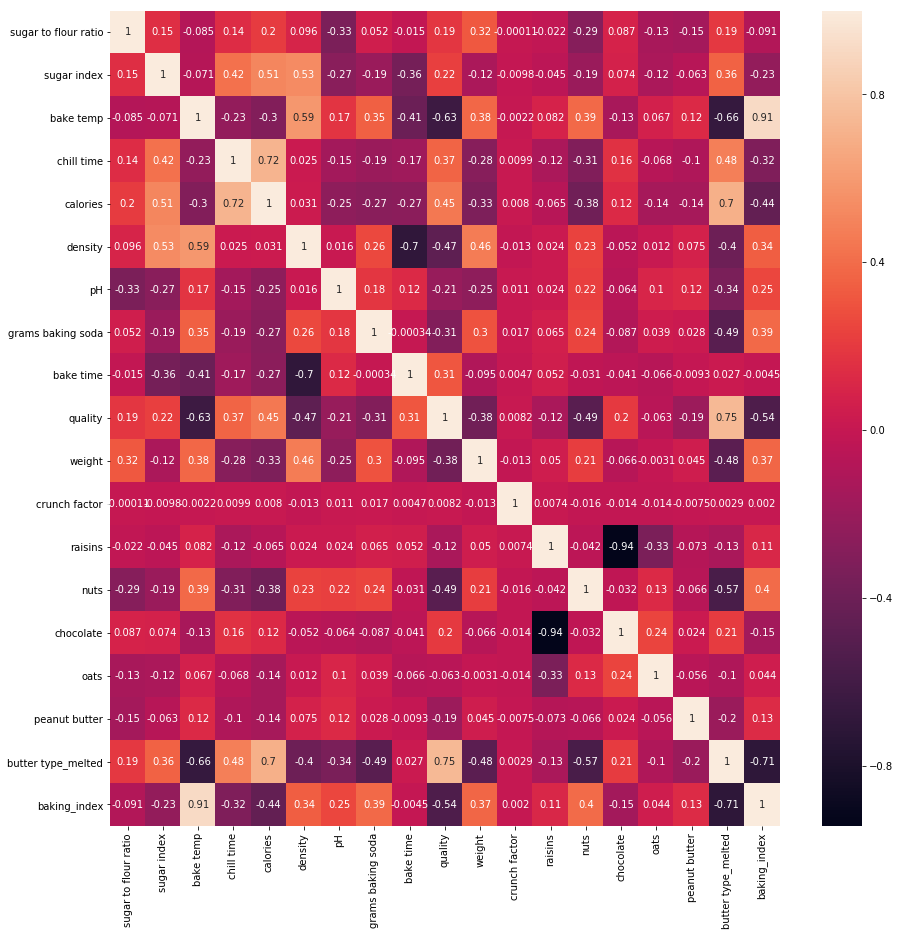

In [145]:
corr = df_clean.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## KNN Classification algorithm

In [211]:
X = df_clean.drop(columns= ['quality'])
y = df_clean['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42, stratify =y)

In [212]:
KN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', algorithm = 'auto', leaf_size = 30, p= 2, metric = 'minkowski')
KN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [213]:
y_pred = KN.predict(X_test)

### Metrics and Hyperparameter tunning

In [218]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   5,   3,   0,   1,   0,   0],
       [  0,   1,  81,  26,   2,   3,   2,   0],
       [  1,   1,  37,  59,  13,   9,   3,   0],
       [  0,   1,  10,  18, 144,  76,  12,   2],
       [  0,   0,   5,   8,  74, 222,  39,   6],
       [  0,   1,   0,   2,  10,  50,  73,   5],
       [  0,   0,   0,   0,   4,   7,   4,  12]], dtype=int64)

In [219]:
accuracy_score(y_test, y_pred)

0.5721200387221684

In [220]:
#tunning number of neighbors
neighbors = list(range(1,50,2))
cv_scores_u = []
cv_scores_d = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p= 2, metric = 'minkowski')
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores_u.append(scores.mean())

    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'auto', leaf_size = 30, p= 2, metric = 'minkowski')
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores_d.append(scores.mean())
    

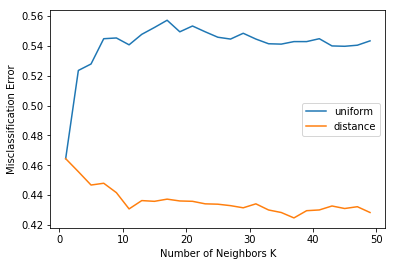

with "uniform" optimal k = 1 with score = 0.5356054302451493
with "distance" optimal k = 37 with score = 0.575292677157221


In [221]:
MSEu = [1-x for x in cv_scores_u]
MSEd = [1-x for x in cv_scores_d]

# plot misclassification error vs k
plt.plot(neighbors, MSEu)
plt.plot(neighbors, MSEd)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.legend(['uniform','distance'])
plt.show()

print(f'with "uniform" optimal k = {neighbors[MSEu.index(min(MSEu))]} with score = {1-min(MSEu)}')
print(f'with "distance" optimal k = {neighbors[MSEd.index(min(MSEd))]} with score = {1-min(MSEd)}')

#### Numerical metrics because, althought we are performing a 'categorical' classification, this way we can measure how far are the model from the reality

In [222]:
import numpy as np
np.mean(list((y_pred-y_test)**2))

0.8576960309777347

## SVC Linear Algorithm

In [223]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
clf.fit(X, y)

y_pred = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Metrics

In [224]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   9,   0,   0,   0,   0],
       [  0,   0,   0, 113,   0,   2,   0,   0],
       [  0,   0,   2, 108,   4,   9,   0,   0],
       [  0,   0,   0, 109,  43, 111,   0,   0],
       [  0,   0,   0, 104,  21, 229,   0,   0],
       [  0,   0,   0,  23,   5, 112,   1,   0],
       [  0,   0,   0,   4,   2,  21,   0,   0]], dtype=int64)

In [225]:
accuracy_score(y_test, y_pred)

0.3688286544046467

#### Numerical metrics because, althought we are performing a 'categorical' classification, this way we can measure how far are the model from the reality

In [226]:
np.mean(list((y_pred-y_test)**2))

1.3359148112294288